## **Análise do Impacto da Inflação**

A inflação é a taxa à qual o nível geral de preços de bens e serviços aumenta ao longo do tempo, o que leva a uma diminuição do poder de compra do dinheiro. Indica o quanto um conjunto de bens e serviços se tornou mais caro durante um determinado período.

### **Análise do Impacto da Inflação: Visão Geral**

A inflação ocorre quando há um aumento sustentado no nível geral de preços de bens e serviços numa economia ao longo do tempo. Tem impacto em vários aspectos da economia, incluindo poder de compra, comportamento do consumidor, poupança e investimento. A inflação moderada é normalmente um sinal de uma economia saudável e em crescimento, uma vez que incentiva os gastos e o investimento. No entanto, uma inflação elevada ou imprevisível pode corroer o valor do dinheiro, perturbar o planeamento financeiro e conduzir à incerteza econômica.

Para analisar o impacto da inflação, precisamos de compará-la com outros indicadores econômicos. Assim, para analisar o impacto da inflação na economia, iremos compará-la com as taxas de câmbio ao longo do tempo. Esta comparação é importante porque as taxas de câmbio são influenciadas pelos diferenciais de inflação entre países, de modo que uma inflação mais elevada num país geralmente leva a uma moeda mais fraca em relação a países com inflação mais baixa.

In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
inflation_data = pd.read_csv('Inflation_Rates_Transformed-2.csv')
exchange_rate_data = pd.read_csv('Taxa_Cambio_Real_Dolar.csv')

In [16]:
exchange_rate_data.head()

,Ano,Media Taxa de Cambio (R$/USD)
0,1996,1.0051
1,1997,1.0780
2,1998,1.1611
3,1999,1.8147
4,2000,1.8302


In [17]:
exchange_rate_data.columns = ['Year', 'Exchange_Rate']

In [18]:
inflation_data.head()

,Country,Year,Inflation_Rate
0,Brazil,1980,90.2
1,United States,1980,13.5
2,Brazil,1981,101.7
3,United States,1981,10.4
4,Brazil,1982,100.6


Iremos preparar agora este conjunto de dados para análise, juntando as partes relevantes destes conjuntos de dados para analisar o impacto da inflação nas taxas de câmbio.

In [19]:
# filtrar os dados de inflação do Brasil e dos Estados Unidos
inflation_filtered_df = inflation_data[inflation_data['Country'].isin(['Brazil', 'United States'])]

In [20]:
# fazer uma tabela dinâmica nos dados de inflação para ter colunas separadas para as taxas de inflação da Brasil e dos Estados Unidos
inflation_pivot_df = inflation_filtered_df.pivot(index='Year', columns='Country', values='Inflation_Rate').reset_index()

In [21]:
# juntar os dados da taxa de câmbio com os dados da inflação
merged_df = pd.merge(exchange_rate_data, inflation_pivot_df, on='Year')

In [22]:
# renomear colunas
merged_df.columns = ['Year', 'Exchange Rate (BRL/USD)', 'Brazil Inflation Rate', 'United States Inflation Rate']

In [23]:
merged_df.head()

,Year,Exchange Rate (BRL/USD),Brazil Inflation Rate,United States Inflation Rate
0,1996,1.0051,15.8,2.9
1,1997,1.0780,6.9,2.3
2,1998,1.1611,3.2,1.5
3,1999,1.8147,4.9,2.2
4,2000,1.8302,7.0,3.4


Vamos começar analisando a tendência das taxas de inflação tanto no Brasil quanto nos Estados Unidos juntamente com a taxa de câmbio

In [24]:
from plotly.subplots import make_subplots

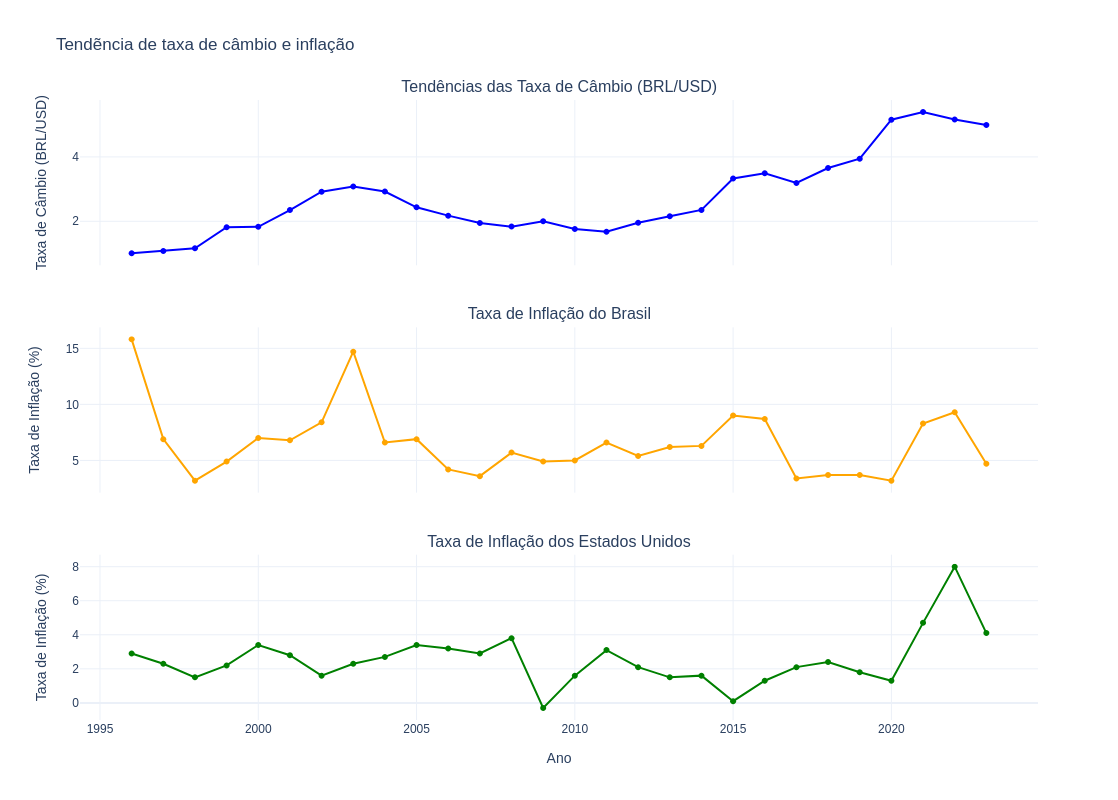

In [25]:
fig = make_subplots(
    rows=3, cols=1, shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=("Tendências das Taxa de Câmbio (BRL/USD)",
                    "Taxa de Inflação do Brasil",
                    "Taxa de Inflação dos Estados Unidos"))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                          y=merged_df['Exchange Rate (BRL/USD)'],
                          mode='lines+markers',
                          marker=dict(color='blue'),
                          name='Taxa de Câmbio (BRL/USD)'),
                row=1, col=1)

fig.add_trace(go.Scatter(x=merged_df['Year'],
                          y=merged_df['Brazil Inflation Rate'],
                          mode='lines+markers',
                          marker=dict(color='orange'),
                          name='Taxa de Inflação da Brasil'),
               row=2, col=1)

fig.add_trace(go.Scatter(x=merged_df['Year'],
                          y=merged_df['United States Inflation Rate'],
                          mode='lines+markers',
                          marker=dict(color='green'),
                          name='Taxa de Inflação dos Estados Unidos'),
               row=3, col=1)

fig.update_layout(height=800,
                  width=900,
                  showlegend=False,
                  title_text="Tendẽncia de taxa de câmbio e inflação",
                  xaxis3_title="Ano",
                  template='plotly_white')

fig.update_yaxes(title_text="Taxa de Câmbio (BRL/USD)", row=1, col=1)
fig.update_yaxes(title_text="Taxa de Inflação (%)", row=2, col=1)
fig.update_yaxes(title_text="Taxa de Inflação (%)", row=3, col=1)

fig.show()

A taxa de câmbio apresenta uma tendência geral ascendente ao longo dos anos, o que indica uma desvalorização do real brasileiro face ao dólar americano.

Após a implantação do Plano Real (1994), a taxa de inflação do Brasil tem flutuado significativamente ao longo dos anos, com alguns picos de inflação elevada (por exemplo, no ano de 2003) e uma inflação mais estável nos demais anos. Os Estados Unidos registaram geralmente taxas de inflação mais baixas e mais estáveis ​​em comparação com o Brasil, com menos flutuações extremas.

A seguir, vamos realizar uma análise de correlação para explorar a relação entre as taxas de inflação e as taxas de câmbio.

In [26]:
correlation_matrix = merged_df[['Exchange Rate (BRL/USD)',
                                'Brazil Inflation Rate',
                                'United States Inflation Rate']].corr()

correlation_matrix

,Exchange Rate (BRL/USD),Brazil Inflation Rate,United States Inflation Rate
Exchange Rate (BRL/USD),1.000000,-0.041607,0.346287
Brazil Inflation Rate,-0.041607,1.000000,0.182346
United States Inflation Rate,0.346287,0.182346,1.000000


Resultados da análise de correlação:

1. Taxa de Câmbio vs. Taxa de Inflação (Brasil): O coeficiente de correlação é de aproximadamente -0,04, o que indica uma relação negativa fraca. Isto sugere que à medida que a inflação no Brasil aumenta, o real brasileiro tende a depreciar-se em relação ao dólar, embora a relação não seja muito forte.
2. Taxa de Câmbio vs. Taxa de Inflação (Estados Unidos): O coeficiente de correlação é de aproximadamente 0,34, o que indica uma relação positiva fraca. Sugere que a inflação mais elevada nos Estados Unidos pode estar associada a uma valorização do dólar americano face ao real brasileiro, mas, mais uma vez, a relação não é forte.
3. Taxa de inflação (Brasil) vs. Taxa de inflação (Estados Unidos): A correlação entre as taxas de inflação do Brasil e dos Estados Unidos é muito fraca e positiva (0,18), o que indica que as taxas de inflação nestes dois países não se movem juntas.

A seguir, faremos uma análise comparativa para destacar períodos de divergência ou convergência significativa entre as taxas de inflação e as taxas de câmbio:

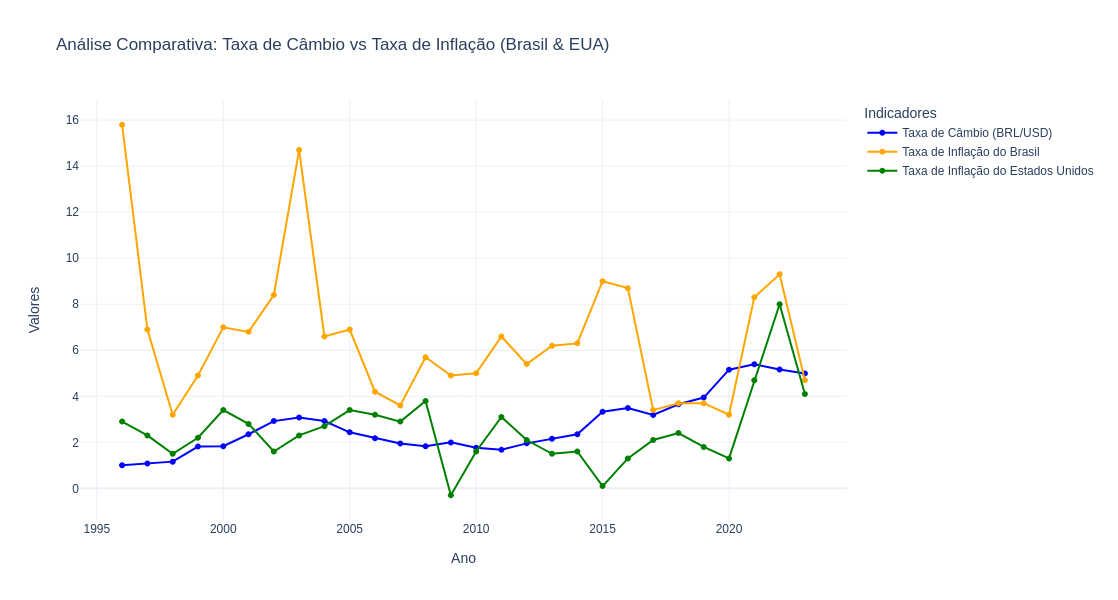

In [27]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Exchange Rate (BRL/USD)'],
                         mode='lines+markers',
                         name='Taxa de Câmbio (BRL/USD)',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Brazil Inflation Rate'],
                         mode='lines+markers',
                         name='Taxa de Inflação do Brasil',
                         line=dict(color='orange')))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['United States Inflation Rate'],
                         mode='lines+markers',
                         name='Taxa de Inflação do Estados Unidos',
                         line=dict(color='green')))

fig.update_layout(title='Análise Comparativa: Taxa de Câmbio vs Taxa de Inflação (Brasil & EUA)',
                  xaxis_title='Ano',
                  yaxis_title='Valores',
                  legend_title_text='Indicadores',
                  template='plotly_white',
                  height=600,
                  width=1000)

fig.show()

Resultados da análise comparativa:

1. Início do Plano Real até o ano 2000: Um período de inflação em queda no Brasil que coincide com um período de relativa estabilidade da taxa de câmbio. Isto sugere a alta confiança no Plano Real na economia brasileira.
2. Década de 2000: O período mostra, apesar do pico em 2003, uma tendência de redução da inflação no Brasil e um pequeno enfraquecimento do BRL, o que indica que a inflação pode estar a contribuir para os movimentos da taxa de câmbio.
3. A partir de 2010: A taxa de câmbio começa a subir, enquanto as taxas de inflação do Brasil e dos Estados Unidos permanecem relativamente baixas, com alguns picos em alguns anos (Brasil: 2015, 2016, 2021 e 2022. EUA: 2022). Esta divergência sugere que a taxa de câmbio é influenciada por factores adicionais para além da inflação, tais como o crescimento econômico, a política monetária e a dinâmica do comércio internacional.

### **Analisando a inflação com base na paridade do poder de compra (PPP)**

A **Paridade do Poder de Compra** (PPC) é uma teoria econômica que sugere que, a longo prazo, as taxas de câmbio entre dois países devem ajustar-se para que um cesta de bens custe o mesmo em ambos os países quando cotado numa moeda comum. A PPC é usada como um método para comparar a produtividade econômica e os padrões de vida entre diferentes países. Se a taxa de inflação de um país for superior à de outro, a sua moeda deverá depreciar-se em conformidade para manter a paridade no poder de compra e garantir que os mesmos bens custam o mesmo em ambos os locais.

Analisaremos agora se a teoria da **Paridade do Poder de Compra** é válida, comparando as taxas de inflação relativa e os movimentos da taxa de câmbio ao longo do tempo. Proporcionará uma compreensão mais profunda sobre se a taxa de câmbio está alinhada com o valor teórico baseado nos diferenciais de inflação.

Para testar se a PPP se aplica ao Brasil e aos Estados Unidos, podemos:

    - Calcule a taxa de câmbio esperada com base no PPC
    - Compare a taxa de câmbio real com a taxa de câmbio esperada baseada em PPPC

A fórmula para previsão da taxa de câmbio baseada em PPC é:

    Taxa de câmbio esperada = taxa de câmbio inicial × ((1 + taxa de inflação no Brasil) / (1 + taxa de inflação nos EUA))

Vamos calcular e visualizar a taxa de câmbio esperada baseada em PPC versus a taxa de câmbio real:

In [28]:
initial_exchange_rate = merged_df['Exchange Rate (BRL/USD)'].iloc[0]

# calcular a taxa de câmbio esperada com base no PPC
merged_df['Expected Exchange Rate (PPP)'] = initial_exchange_rate * (
    (1 + merged_df['Brazil Inflation Rate'] / 100) / (1 + merged_df['United States Inflation Rate'] / 100)
).cumprod()

In [29]:
fig = go.Figure()

# Imprimir a taxa de câmbio atual
fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Exchange Rate (BRL/USD)'],
                         mode='lines+markers',
                         name='Taxa de Câmbio Atual (BRL/USD)',
                         line=dict(color='blue')))

# Imprimir a taxa de câmbio baseado no PPC
fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Expected Exchange Rate (PPP)'],
                         mode='lines+markers',
                         name='Taxa de Câmbio Esperada (PPC)',
                         line=dict(color='orange', dash='dash')))

fig.update_layout(title='Taxa de Câmbio Atual vs. Esperada (PPC)',
                  xaxis_title='Ano',
                  yaxis_title='Taxa de Câmbio (BRL/USD)',
                  legend_title_text='Taxas de Câmbio',
                  template='plotly_white',
                  height=600,
                  width=1000)

fig.show()

A linha azul representa a taxa de câmbio real (BRL/USD) ao longo do tempo, enquanto a linha tracejada laranja representa a taxa de câmbio esperada com base na PPC. Em alguns períodos, a taxa de câmbio real segue de perto a taxa esperada baseada na PPC, o que sugere que a PPC se mantém. No entanto, noutros períodos, existem desvios significativos entre os dois.

A taxa de câmbio real mostra um aumento mais rápido em comparação com a taxa de câmbio esperada com base na PPC. Sugere que, de acordo com o PPC, o BRL está se depreciando mais do que realmente deveria.

Dados retirados nestes sites:

Taxa da Inflação Brasil e Estados Unidos - 
https://www.kaggle.com/datasets/sazidthe1/global-inflation-data

Média da Taxa de Câmbio entre Real e Dólar - 
http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=31924